# Day 16 Pre-Class Assignment
---


### <p style="text-align: right;"> &#9989; Put your name here</p>

## Predicting unobserved values and determining a good fit

<img src="https://imgs.xkcd.com/comics/sphere_tastiness.png" style="display:block; margin-left: auto; margin-right: auto; width: 35%" alt="This comic is a joke about the incorrect application of linear extrapolation.">
<p style="font-size:0.85em; text-align: center;">Credits: <a href="https://xkcd.com/2893/" target="_blank">xkcd.com</a></p>

### Learning goals for today's pre-class assignment

* Be able to articulate what regression is and why we use it
* Use NumPy to fit a specific polynomial function to data
* Describe the nature of building and using models to understand the world


## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

----

## 1. Linear regression

In many applications, data depends on other data. This is expressed with dependent variables that depend on independent variables. For example, in the past in-class we saw that there is a correlation between the number of days needed for willow (*Salix*) to flower and summer temperature. This means that there is a mystery function $f$ that by knowing temperature, we can **predict** the flowering day:
$$f\:(\text{Min. June Temperature}) = \text{Willow flowering days}.$$

One of the problems that arises in data science is that the data is invariably imperfect. We often say that the data has "noise" or "fluctuations". The problem is that we know that some of these fluctuations are not real: they are caused by errors in our measurements or any other factor that is not in our control. We do not want to take those fluctuations literally. In other cases the fluctuations might actually be real, but we don't want to focus our attention on those details because we simply want the trend. Regression solves this problem by providing a methodology to find a smoother function that is consistent with your data but doesn't attempt to match every detail, which may or may not be a real signal.

A common form of regression is called **simple linear regression**. Simple linear regression finds the best line that goes through noisy data. For example, looking *both* at scatterplot and at the Pearson correlation coefficient, we know that it makes sense to fit a line between temperature and willow flowering day.

#### Watch the following video on what makes a line the best fit line AND how to assess its "goodness of fit"

You just need to watch the video until the 12:10 mark, when he discusses:
1. Least Squares to fit a line to the data.
2. The meaning of $R^2$.
   
Don't worry much about his references to previous videos or the formulas, but focus on how to interpret the values.

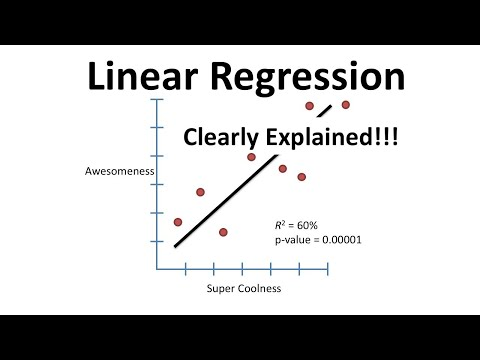

In [1]:
from IPython.display import YouTubeVideo  
YouTubeVideo("7ArmBVF2dCs",width=640,height=360, end=12*60+11) 

&#9989;&nbsp; **Question 1** 

- In your own words, explain why linear regression can be useful for data analysis

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **Question 2** 

$R^2$ is sometimes referred to as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination).

- Explain what is the difference between a coefficient of correlation and a coefficient of determination. Your best guess is fine.



<font size=+3>&#9998;</font> *Put your answer here.*


Remember at the end of the StatQuest on correlation (from last pre-class), Josh mentioned that while correlation coefficients are useful to determine if two variables are linearly related, the exact values are hard to interpret. Read this in Josh's voice:

> Say that for an experiment you measure mouse age, weight, size. You find that age and weight are correlated with a coefficient of 0.8. Age and size are also correlated, but only with a coefficient of 0.4. Does that mean that age is "doubly correlated" to weight compared to size? What does "doubly correlated" mean in the first place?

&#9989;&nbsp; **Question 3** 

- Do you think $R^2$ would be a better way to understand the relationship between mouse age, weight, and size? Explain your answer.

<font size=+3>&#9998;</font> *Put your answer here.*


---

## 2. Computing linear regressions with `stats.linregress`

Remember that in general a line equation is $y = ax + b.$ For the temperature-day relationship from last class, a large Pearson correlation coefficient usually suggests that it is sensible to fit a line to the data. To perform a linear regression we need to figure out the best $a$ and $b$ values so that the formula
$$\text{Willow flowering days} = a\times\text{Min. June Temperature} + b$$
is the most predictive.

Good news: SciPy's `stats` submodule can also do that for us!

### 2.1 The usual setup

In the previous in-class, we saw that [Kettenbach et al (2017)](https://doi.org/10.1002/ece3.3272) fitted linear models between temperature and flowring days (Figure 2). Let's reproduce them. Before jumping straight into linear regression, we need to do the standard steps:

- Import the usual modules
- Load the data
- Remove pesky NaNs
- Plot the data to make sure it makes sense to fit a line

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
pheno = pd.read_csv('salix+and+pv+phenology+data.csv').dropna(axis=0, how='any')
print(pheno.shape)
pheno.head()

(24, 8)


,location,year,altitude,min temp June,latitude,longitude,julian day - Salix,julian day - Polemonium
0,boulder co,1907,"11,500",11.300000,40.0150,105.2705,201,201
1,boulder co,1908,10000,10.888889,40.0150,105.2705,178,179
2,chafee,2000,"11,520",11.111111,38.7537,106.2522,189,189
3,chafee,2000,"11,520",11.111111,38.7537,106.2522,189,189
4,custer,1999,"10,880",9.722222,38.0616,105.3131,196,203


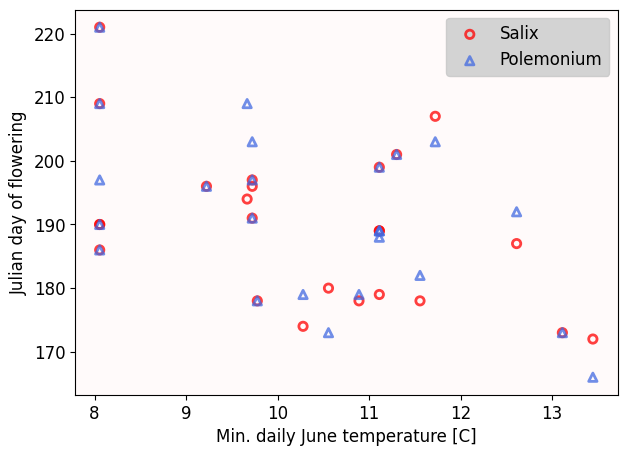

In [4]:
temp = pheno['min temp June']
salix = pheno['julian day - Salix']
polemonium = pheno['julian day - Polemonium']

# What parameters have you not used yet?
# Comment those and make sure you understand what they do
fontsize = 12
plt.figure(figsize=(7,5))
plt.axes(facecolor='snow')
plt.scatter(temp, salix, marker='o', ec='r', fc='none', lw=2, alpha=0.75, label='Salix')
plt.scatter(temp, polemonium, marker='^', ec='royalblue', fc='none', lw=2, alpha=0.75, label='Polemonium')
plt.legend(loc='upper right', fontsize=fontsize, facecolor='lightgray', framealpha=1)
plt.ylabel('Julian day of flowering', fontsize=fontsize)
plt.xlabel('Min. daily June temperature [C]', fontsize=fontsize)
plt.tick_params(labelsize=fontsize);

&#9989;&nbsp; **Task 2** 

- Are there any functions or parameters that you were not aware of in the matplotlib code above? Comment the bits of code that are new to you.

If you are unsure what a parameter does, try changing its value and see what happens.

### 2.2 Using `stats.linregress`

```python
# the order of variables DOES matter
stats.linregress(x_axis_values, y_axis_values)
```

If you [read `stats.linregress` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), you'll realize that it returns another *named tuple* (like `stats.pearsonr`) but it has more stuff and different names. From that named tuple, what we care for at the moment is:
- `.slope`: The $a$ value in the formula we stated at the beginning of Section 2
- `.intercept`: The $b$ value
- `.rvalue`: Pearson's coefficient
- `.pvalue`: p-value associated to Pearson's coefficient

In [5]:
# Computing a linear regression between Salix flowering days and temperature
regression = stats.linregress(temp, salix)

print('Slope:\t', regression.slope)
print('Intercept:\t', regression.intercept)
print('Pearson r:\t', regression.rvalue)
print('p-value\t', regression.pvalue)

Slope:	 -3.7022326066025366
Intercept:	 228.00983159483377
Pearson r:	 -0.4798480392684013
p-value	 0.017647509589459896


Our data then suggest us that the best linear formula between flowering days and temperature is:
$$\text{Willow flowering days} = -3.7\times\text{Min. June Temperature} + 228.0$$

**Interpreting the numbers in a linear model**

The slope tells us how much does the $y$-axis value change for a unit increase of the $x$-value.
- In this case, for every degree Celcius that the minimum temperature increases, it takes 3.7 less (Julian) days for willow to flower.

The intercept tells us the $y$-axis value when the $x$-value is zero.
- If the min. temperature is 0&deg;C (freezing), then willow will need 228 days to flower.

&#9989;&nbsp; **Quick Question** 

- Does our formula match with the one computed by [Kettenbach et al.](https://doi.org/10.1002/ece3.3272)? Check the caption of Figure 3.

### 2.3 Making predictions

Let's use our formula to predict the julian day of flowering for *unobserved* temperatures. With NumPy, we make an array that goes from 7&deg;C to 16&deg;C. Then we apply the formula to this array and plot the results as a line.

Remember that one of cool things of NumPy is that we can apply math operations to a whole array instead of going element by element with a loop.

In [6]:
# Task 3

# Comment these lines
pred_temps = np.linspace(7, 16, 50)
pred_salix = regression.slope * pred_temps + regression.intercept

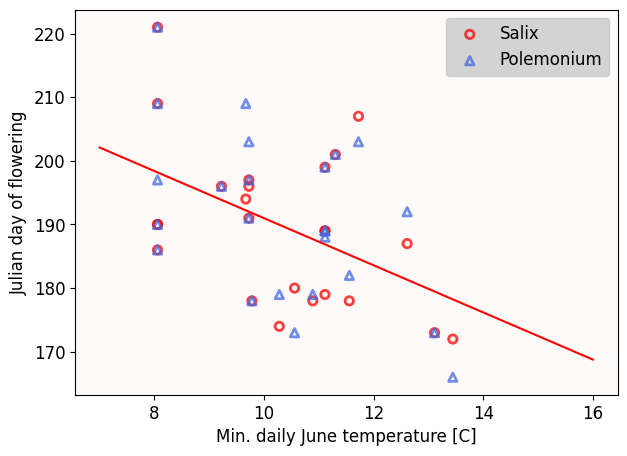

In [7]:
plt.figure(figsize=(7,5))
plt.axes(facecolor='snow')
plt.scatter(temp, salix, marker='o', ec='r', fc='none', lw=2, alpha=0.75, label='Salix')
plt.scatter(temp, polemonium, marker='^', ec='royalblue', fc='none', lw=2, alpha=0.75, label='Polemonium')
plt.plot(pred_temps, pred_salix, c='r')
plt.legend(loc='upper right', fontsize=fontsize, facecolor='lightgray', framealpha=1)
plt.ylabel('Julian day of flowering', fontsize=fontsize)
plt.xlabel('Min. daily June temperature [C]', fontsize=fontsize)
plt.tick_params(labelsize=fontsize);

### 2.4 Making more predictions back and forth

We can also check for individual values. According to our regression, we can make the following predictions:

In [8]:
t = 20
day = regression.slope * t + regression.intercept
print('If the min temperature in June is', t, 'C, then willow will only need', round(day), 'days to flower.\n')

t = 2
day = regression.slope * t + regression.intercept
print('If the min temperature in June is', t, 'C, then willow will only need', round(day), 'days to flower.')

If the min temperature in June is 20 C, then willow will only need 154 days to flower.

If the min temperature in June is 2 C, then willow will only need 221 days to flower.


We can also make predictions the other way around: What is the required temperature for willow to flower in just 100 days? What sort of weather do we need if we want to delay willow's flowering to 250 days?

To answer that, we need to invert our linear formula. In this case if $y = ax + b$, then:
$$x = \left(\frac 1a\right) y - \frac ba$$


In [9]:
# predictions the other way around
inv_slope = 1/regression.slope
inv_intercept = -regression.intercept/regression.slope

day = 100
t = inv_slope * day + inv_intercept
print('We need a min temperature in June of', round(t,1), 'C, for the willow to flower in ', day, 'days.\n')

day = 250
t = inv_slope * day + inv_intercept
print('We need a min temperature in June of', round(t,1), 'C, for the willow to flower in ', day, 'days.')

We need a min temperature in June of 34.6 C, for the willow to flower in  100 days.

We need a min temperature in June of -5.9 C, for the willow to flower in  250 days.


---

## 3. Important mathematical note: order matters

The correlation coefficient of $y$ versus $x$ is always **equal** to the correlation coefficient of $x$ versus $y$.
However, the inverted best-fit line for $y$ versus $x$ is **different** from the best-fit line for $x$ versus $y$.

&#9989;&nbsp; **Task 4** 

Compute the best-fit line for temperature versus flowering day. That is, swap the $x$ and $y$ axis and do `stats.linregress(salix, temp)` instead.

- Make a scatter plot of temperature versus flowering day (just focus on *Salix*/willow)
- Draw the best fit line for temperature versus flowering
- Overlay the best fit line for flowering versus temperature (you just need to uncomment the last line)

In [10]:
# Your code



# uncomment the line below once you finish your code
#plt.plot(pred_salix, pred_temps, ls='dashed', c='b')

Are you surprised the lines are different (quite different actually)?

If you are curious, notice that you cannot simply swap $x$ and $y$ values in the [actual formula for the best-fit line slope](https://www.youtube.com/watch?v=1YUHyBTztOc) and get the same result.

----

## 4. (Optional) Extra practice

If you want to get more practice, make new cells below and repeat all the steps from Section 2 for the *Polemonium* flowers.

Are your predictions different from *Salix*?

---

### Assignment wrap-up

Please fill out form from the link below. You must log-in using your MU credentials. **You must completely fill this out in order to receive credit for the assignment!** 

#### https://forms.office.com/r/37zmzq3PT8

In [11]:
# Click on the link above if this cell fails to produce a survey form.

from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/37zmzq3PT8" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Click the link above if this cell fails to produce a survey
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Canvas web page.  Go to the "Pre-class assignments" folder, find the appropriate submission folder link, and upload it there.

See you in class!

&#169; Copyright 2026,  Division of Plant Science & Technology&mdash;University of Missouri